In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd

data = pd.read_csv(r"/content/drive/My Drive/IDC410/Data.csv")
print(data.columns)
data.head()

Index(['Unnamed: 0', 'sentence', 'label'], dtype='object')


,Unnamed: 0,sentence,label
0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,sentence
1,1,"Born and raised in Houston, Texas, she perform...",sentence
2,2,"Managed by her father, Mathew Knowles, the gro...",sentence
3,3,Their hiatus saw the release of Beyoncé's debu...,sentence
4,4,Following the disbandment of Destiny's Child i...,sentence


**RESTful API :**
---
---

This API is simply a sentence or question identifier of a user's input. It is based on Latent Dirichlet Allocation (LDA) vectorization on Random forest model, And its AUC value is 0.91.

In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


data = data[['sentence', 'label']].copy()
data.dropna(inplace=True)

def preprocess_text(sen):
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

X = data['sentence'].apply(preprocess_text)
y = data['label']

count_vectorizer = CountVectorizer(stop_words='english')
X_counts = count_vectorizer.fit_transform(X)

lda = LatentDirichletAllocation(n_components=10, random_state=42)
X_lda = lda.fit_transform(X_counts)

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.20, random_state=42)

rf = RandomForestClassifier(max_depth=15, n_estimators=40)
rf.fit(X_train, y_train)

plt.figure()

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1], pos_label='sentence')
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend()
plt.show()

NameError: name 'data' is not defined

Then I'm saving the files after the training to use them in making a RESTful API.

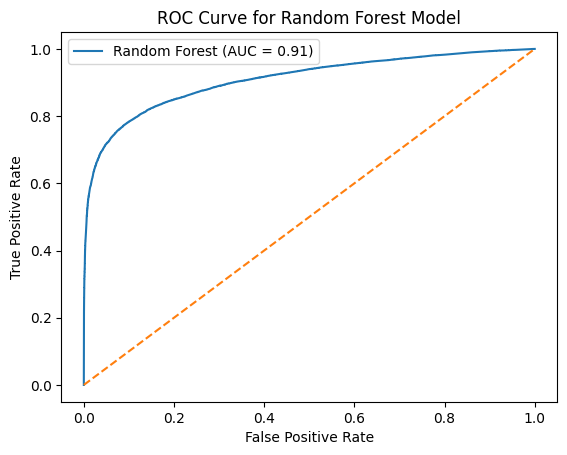

In [ ]:
import pandas as pd
import numpy as np
import re
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


rf = RandomForestClassifier(max_depth=15, n_estimators=40)
rf.fit(X_train, y_train)

with open("count_vectorizer.pkl", "wb") as f:
    pickle.dump(count_vectorizer, f)

with open("lda_model.pkl", "wb") as f:
    pickle.dump(lda, f)

with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf, f)

plt.figure()
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1], pos_label='sentence')
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend()
plt.show()

This API successfully worked fine both on web and POSTMAN. I have attached both URL and POSTMAN result for this API by name "API URL Result.png" & "API POSTMAN Result.png".

**Docker :**
---
---

Then I made a Dockerfile with this code :    
```
FROM python:3.9-slim

WORKDIR /home/ubunt-uwu/Downloads/VS Code/FlaskAPI

COPY requirements.txt .

RUN pip install --no-cache-dir -r requirements.txt

COPY . .

EXPOSE 5000

CMD ["python", "IDC410_API2_MS21024.py"]

```
And requirements.txt file as follows :    
```
Flask
scikit-learn==1.2.2
```
And ran the commands in terminal to build the image and run the container and it also successfully worked fine & is clearly visible on my Docker-desktop also. Then after making a repository on docker hub, I successfully pushed my API image on Docker hub.

**Results :**

It has been pushed on docker hub with name "rtejas1729/question_identifier:v1.0"

Anyone with a Docker ID can easily pull the image via this running command in terminal:
```
docker pull rtejas1729/question_identifier:v1.0
```